In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('/content/EMP_SAL.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
In the above code, we have pre-processed the data. Where we have loaded the dataset, which is given as:

Decision Tree Classification Algorithm
2. Fitting a Decision-Tree algorithm to the Training set
Now we will fit the model to the training set. For this, we will import the DecisionTreeClassifier class from sklearn.tree library. Below is the code for it:

#Fitting Decision Tree classifier to the training set
From sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)
In the above code, we have created a classifier object, in which we have passed two main parameters;

"criterion='entropy': Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.
random_state=0": For generating the random states.
Below is the output for this:


Out[8]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
3. Predicting the test result
Now we will predict the test set result. We will create a new prediction vector y_pred. Below is the code for it:

#Predicting the test set result
y_pred= classifier.predict(x_test)
Output:

In the below output image, the predicted output and real test output are given. We can clearly see that there are some values in the prediction vector, which are different from the real vector values. These are prediction errors.


Decision Tree Classification Algorithm
4. Test accuracy of the result (Creation of Confusion matrix)
In the above output, we have seen that there were some incorrect predictions, so if we want to know the number of correct and incorrect predictions, we need to use the confusion matrix. Below is the code for it:

#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
Output:

Decision Tree Classification Algorithm


In the above output image, we can see the confusion matrix, which has 6+3= 9 incorrect predictions and62+29=91 correct predictions. Therefore, we can say that compared to other classification models, the Decision Tree classifier made a good prediction.

5. Visualizing the training set result:

Here we will visualize the training set result. To visualize the training set result we will plot a graph for the decision tree classifier. The classifier will predict yes or No for the users who have either Purchased or Not purchased the SUV car as we did in Logistic Regression. Below is the code for it:

#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
"""
The numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. Meshgrid function is somewhat inspired from MATLAB.
Consider the above figure with X-axis ranging from -4 to 4 and Y-axis ranging from -5 to 5. So there are a total of (9 * 11) = 99 points marked in the figure each with a X-coordinate and a Y-coordinate. For any line parallel to the X-axis, the X-coordinates of the marked points respectively are -4, -3, -2, -1, 0, 1, 2, 3, 4. On the other hand, for any line parallel to the Y-axis, the Y-coordinates of the marked points from bottom to top are -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5. The numpy.meshgrid function returns two 2-Dimensional arrays representing the X and Y coordinates of all the points.




E
"""
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
fori, j in enumerate(nm.unique(y_set)):
mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Decision Tree Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()
Output:


Decision Tree Classification Algorithm
The above output is completely different from the rest classification models. It has both vertical and horizontal lines that are splitting the dataset according to the age and estimated salary variable.

As we can see, the tree is trying to capture each dataset, which is the case of overfitting.

6. Visualizing the test set result:
Visualization of test set result will be similar to the visualization of the training set except that the training set will be replaced with the test set.

#Visulaizing the test set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
fori, j in enumerate(nm.unique(y_set)):
mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Decision Tree Algorithm(Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()
Output:

Decision Tree Classification Algorithm
As we can see in the above image that there are some green data points within the purple region and vice versa. So, these are the incorrect predictions which we have discussed in the confusion matrix.

In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('/content/EMP_SAL.csv')
data_set

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = data_set.iloc[:, 1:2].values
y = data_set.iloc[:, 2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'friedman_mse',splitter = 'random')
regressor.fit(X, y)

from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
"""
The sklearn. ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques [B1998] specifically designed for trees.
What is ensemble Python?
Ensemble means a group of elements viewed as a whole rather than individually. An Ensemble method creates multiple models and combines them to solve it. Ensemble methods help to improve the robustness/generalizability of the model. In this article, we will discuss some methods with their implementation in Python.
What is the use of RandomForestRegressor?
A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

"""
reg = RandomForestRegressor(n_estimators = 300, random_state = 0)
reg.fit(X,y)

# Predicting a new result
y_pred = reg.predict([[6.5]])

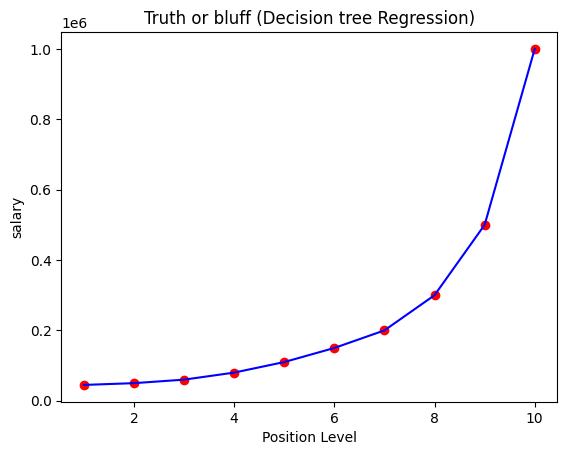

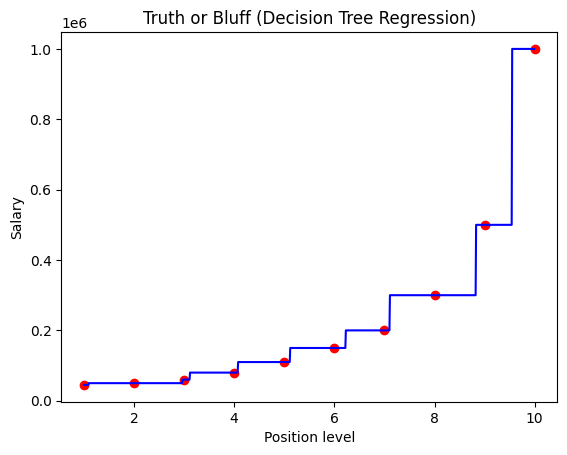

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(X, y, color = 'red')
"""
matplotlib.pyplot.scatter()
Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them. The scatter() method in the matplotlib library is used to draw a scatter plot. Scatter plots are widely used to represent relation among variables and how change in one affects the other.
"""
plt.plot(X,regressor.predict(X), color = 'blue')
"""
Plotting x and y points
The plot() function is used to draw points (markers) in a diagram.

By default, the plot() function draws a line from point to point.

The function takes parameters for specifying points in the diagram.

Parameter 1 is an array containing the points on the x-axis.

Parameter 2 is an array containing the points on the y-axis.
"""
plt.title('Truth or bluff (Decision tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('salary')
plt.show()
#first part is curve is very good & as i explained this is not a decision tree curve becuase we have to get the tree curve
#algorithm of decission tree is by considering the entrophy and information gain spliting the independent variable into several interval
#as per our tutorial we have 2 independent variable diferent interval forms rectangle & we have to get the averate of independent variable that means alorithm will take interval of algorithm
#you have quastion if you taking average of each interval then how do you have a straight line becuse in decission tree each interval it calculateing the averae of dependent variable
#And you cannot find the average of independent variable & this is not a continuous regression model & the best way to visualize the non-continuous model
#lets plot the higher resolution using tree models


#if you advance visualisation along with tree structure then you will get this resule only
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = nm.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()